In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
salary_data=pd.read_csv('datasets/salary.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
x=np.array(salary_data.iloc[:,0].values)
y=np.array(salary_data['Salary'])

In [5]:
from ai.model_selection import train_test_split    

In [6]:
x_train,y_train,x_test,y_test=train_test_split(x,y,0.3)
x_train=x_train.reshape(len(x_train),1)
x_test=x_test.reshape(len(x_test),1)
y_test=y_test.reshape(len(y_test),1)

In [8]:
from ai.machine_learning.linear_models import SGD

In [10]:
model=SGD()

In [11]:
model.fit(x_train,y_train,0.04,5000)

In [12]:
model.slope_intercept()

[[10470.24218068]] 20300.52892608151


In [13]:
y_pred=model.predict(x_test)

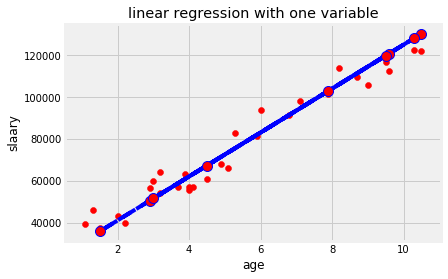

In [14]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("age")
plt.ylabel("slaary")
plt.title("linear regression with one variable")
plt.show()

In [15]:
from ai.metrics import mean_square_error,root_mean_square_error,mean_absolute_error
from ai.metrics import explained_variance_score,r2_score

In [16]:
print(mean_square_error(y_test,y_pred))
print(root_mean_square_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(f"accuracy is {explained_variance_score(y_test,y_pred)*100}%")
print(r2_score(y_test,y_pred))

36716747.72488479
6059.434604390478
5473.162298985202
accuracy is 96.66996424340715%
0.9631269959555762


In [17]:
fish_data=pd.read_csv("datasets/Fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
from ai.preprocessing import LabelEncoder

In [19]:
encoder=LabelEncoder()
fish_data["Species"]=encoder.fit_transform(fish_data["Species"])
fish_data['Species'].unique()

array([5, 4, 0, 2, 1, 3, 6], dtype=int64)

In [20]:
x=np.array(fish_data.drop(["Weight"],axis=1))
y=np.array(fish_data["Weight"])
x_train,y_train,x_test,y_test=train_test_split(x,y,0.3)

In [21]:
model=SGD()

In [22]:
model.fit(x_train,y_train,0.01,4500)

In [23]:
model.slope_intercept()

[[-35.80623033   6.48315495   3.39155755   4.96389724  17.77581895
   -3.25647821]] -19.861826371147192


In [24]:
y_pred=model.predict(x_test)

In [26]:
print(mean_square_error(y_test,y_pred))
print(root_mean_square_error(y_test,y_pred))
#print(mean_absolute_error(y_test,y_pred))
print(f"accuracy is {explained_variance_score(y_test,y_pred)*100}%")
print(r2_score(y_test,y_pred))

6638299.476178773
2576.489758601569
accuracy is 71.83202510542357%
-66.16548504916193
